<a href="https://colab.research.google.com/github/GiancarloSaran/LaboratoryOfComputationalPhysics_Y6/blob/main/07ex_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import binned_statistic as bst
from scipy.integrate import trapz as tpz

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [54]:
mu, sigma, N = 0, 5, 500
x = np.sort(np.random.normal(mu, sigma, N))
N_bins = int(1+np.log2(N)) #Sturge's rule
fact = 1.5 #Too small a factor and it's overfitting
std = 1.06*x.std()*np.float_power(x.size, -1/5)*fact

In [55]:
#Create the KDE
kernels = [norm(xi, std) for xi in x]

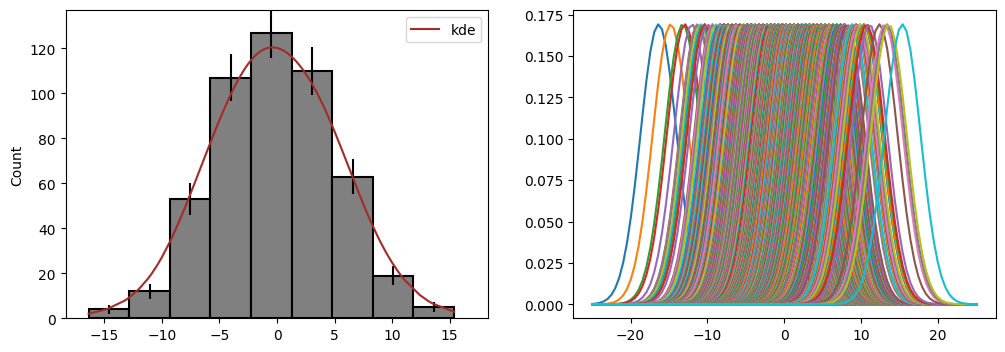

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
count, bins, _ = ax[0].hist(x, N_bins, facecolor='gray', edgecolor='black', lw=1.5)
bincenters = 0.5*(bins[1:]+bins[:-1])
kde = np.sum([ker.pdf(x) for ker in kernels], axis=1)
Z = tpz(kde, x) #Kde normalization
M = tpz(count, bincenters) #histogram normalization
x_range = np.maximum(np.abs(np.min(bins)), np.max(bins)) + 2  #make plot symmetric
y_range = np.max(count) + 10
ax[0].set_xlim(-x_range, x_range)
ax[0].set_ylim(0, y_range)
ax[0].set_ylabel('Count')
ax[0].errorbar(bincenters, count, yerr=np.sqrt(count), fmt= '.', color='black', elinewidth=1.5, ms=0) #Poisson errorbars
ax[0].plot(x, M*kde/Z, color='brown', label='kde')
space = np.linspace(-25, 25, 100)
#plot all the kernels
for ker in kernels:
  ax[1].plot(space, ker.pdf(space), linewidth=1.5)
ax[0].legend()
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

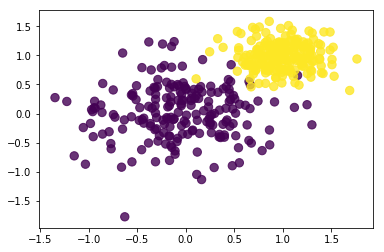

In [5]:
! wget -q -nc https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

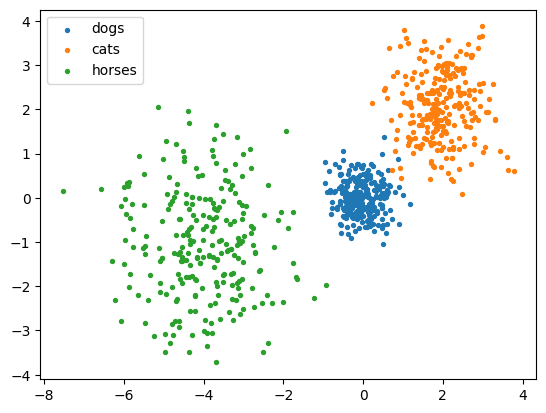

In [53]:
def Gaussian_scatter(mu, sigma, k, labels=None):
  for i in range(len(mu)):
    data = npr.normal(mu[i], sigma[i], size=(k, 2))
    if labels==None:
      name = f'Cluster {i+1}'
    else:
      name = labels[i]
    plt.scatter(data[:, 0], data[:, 1], s=8, label=name)
  plt.legend()

mean = [[0, 0], [2, 2], [-4, -1]]
std = [[0.4, 0.4], [0.6, 0.8], [1, 1.2]]
labels = ['dogs', 'cats', 'horses']
Gaussian_scatter(mean, std, 250, labels)
plt.show()

  3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()`
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [34]:
!wget -q -nc https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

dct = np.load("residuals_261.npy",allow_pickle=True).item()
data = pd.DataFrame(dct)
df = data[np.abs(data['residuals'])<2]

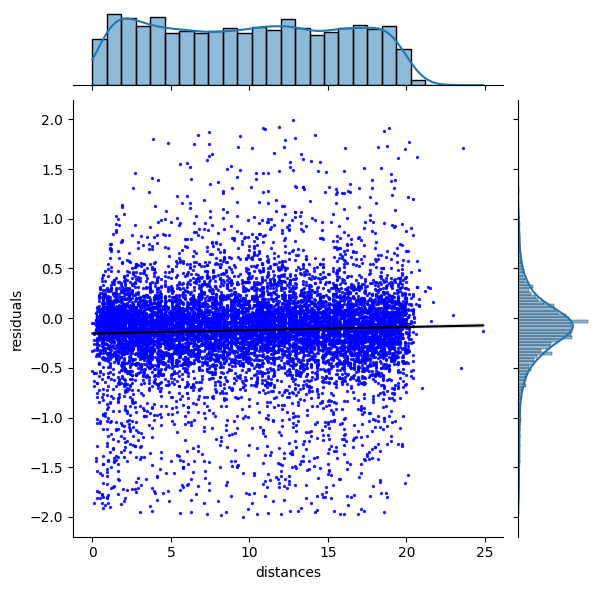

In [33]:
from scipy.stats import linregress as lrg
lrg(df['distances'], df['residuals'])
sns.jointplot(df, x='distances', y='residuals', kind='reg', scatter_kws={'color':'b', 's':2}, line_kws={'color':'black', 'linewidth':1.5})

<ErrorbarContainer object of 3 artists>

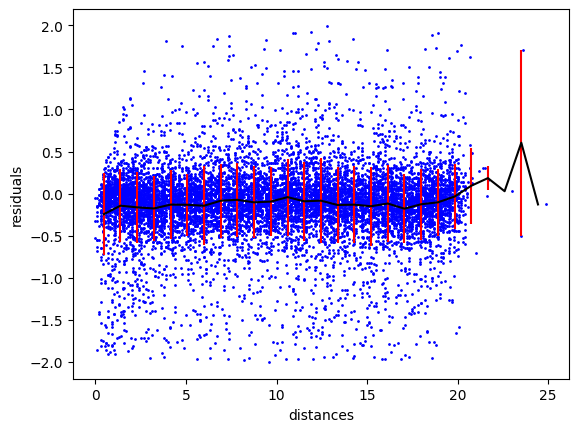

In [24]:
nbins, bins = np.histogram(df['distances'], bins='auto')
x = 0.5*(bins[1:]+bins[:-1])
y, _, _ = bst(df['distances'], df['residuals'], statistic='mean', bins=bins)
erry, _, _ = bst(df['distances'], df['residuals'], statistic='std', bins=bins)
df.plot.scatter(x='distances', y='residuals', color='b', s=1)
plt.errorbar(x, y, erry, color='black', ecolor='red')